Data Reading

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# cell_df = pd.read_csv('Data_Train\DatasetsF.csv')
cell_df = pd.read_csv(r'Data_Train\DatasetsF.csv')
cell_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Train\\DatasetsF.csv'

In [ ]:
cell_df.shape

(424930, 3)

In [ ]:
X = cell_df.iloc[:,[0,1]]
Y = cell_df.iloc[:,2]

In [4]:
X.head()

,Openness,MAR
0,0.034188,0.225308
1,0.376313,0.192497
2,0.378906,0.172807
3,0.375000,0.164998
4,0.392857,0.179707


In [5]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Kelas, dtype: int64

Data Split

In [6]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# X_Train, X_Test,Y_Train,Y_Test = train_test_split(X, Y, test_size=0.25, random_state=42)

# # Apply SMOTE
# smote = SMOTE()
# X_train_smote, y_train_smote = smote.fit_resample(X_Train, Y_Train)
# X_Test_smote, y_test_smote = smote.fit_resample(X_Test, Y_Test)
# print(pd.Series(y_train_smote).value_counts())
# print(pd.Series(y_test_smote).value_counts())
from sklearn.model_selection import train_test_split
X_Train, X_Test,Y_Train,Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# print("training data : ", X_train_smote.shape)
# print("Test data : ",X_Test_smote.shape)

print("training data : ", X_Train.shape)
print("Test data : ",X_Test.shape)
print("training data : ", Y_Train.shape)
print("Test data : ",Y_Test.shape)

training data :  (339944, 2)
Test data :  (84986, 2)
training data :  (339944,)
Test data :  (84986,)


In [8]:
# #cek data sebelum normalisasi
# print(X_train_smote[:321640])

Normalisasi Data

In [8]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_Train_Scale = sc_X.fit_transform(X_train_smote)
# X_Test_Scale = sc_X.transform(X_Test_smote)
# # Y_Train_Scale = sc_X.fit_transform(y_train_smote)
# # Y_Test_Scale = sc_X.transform(y_test_smote)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_Train)
X_test = sc_X.transform(X_Test)

In [10]:
# #cek data setelah Normalisasi
print(X_train[:339943])

[[-0.37438885  1.23729601]
 [-1.23311693  0.31761964]
 [-0.62279897 -0.86333107]
 ...
 [ 1.74208607 -0.03674199]
 [-0.33221843 -0.74807812]
 [-0.11875893 -0.37871417]]


In [9]:
import pickle
filename_scaler = 'models/scaler.pkl'
pickle.dump(X_Train, open(filename_scaler, 'wb'))


Data Training

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

Linear Kernel

In [11]:
# svc_linear=SVC(kernel='linear') 


# # fit classifier to training set
# svc_linear.fit(X_Train_Scale,y_train_smote)


# # make predictions on test set
# y_pred_linear=svc_linear.predict(X_Test)


# # compute and print accuracy score
# print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_Test, y_pred_linear)))

svc_linear=SVC(kernel='linear') 


# fit classifier to training set
svc_linear.fit(X_Train,Y_Train)


# make predictions on test set
y_pred_linear=svc_linear.predict(X_Test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_Test, y_pred_linear)))

Model accuracy score with default hyperparameters: 0.4240


In [12]:
cm = confusion_matrix(Y_Test, y_pred_linear)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[18353  7537  9705]
 [12063  9552 14135]
 [11413  6332 17143]]


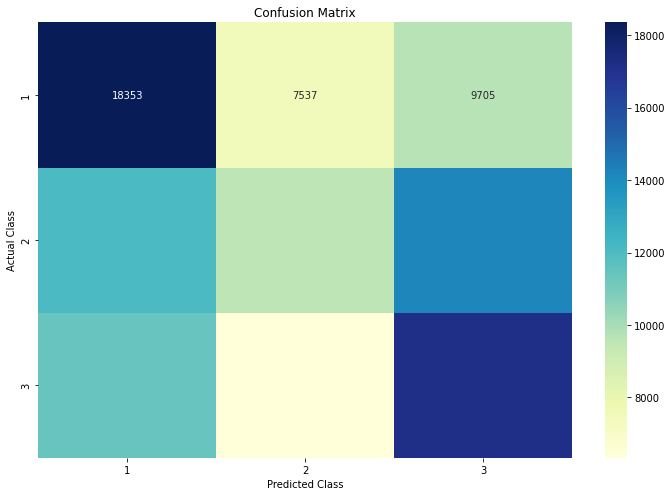

In [13]:
import seaborn as sns

# Assuming 'cm' is your confusion matrix data
class_labels = ['1', '2', '3']

plt.figure(figsize=(10, 7))  # Adjust the figure size if necessary
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()  # Ensure this is the last line related to plot rendering


In [28]:
import pickle
filename = 'models/model_linear.pkl'
pickle.dump(svc_linear, open(filename, 'wb'))

NameError: name 'svc_linear' is not defined

In [19]:
from sklearn.metrics import classification_report

report = classification_report(Y_Test, y_pred_linear, output_dict=False)
print(report)

              precision    recall  f1-score   support

           1       0.44      0.52      0.47     35595
           2       0.41      0.27      0.32     35750
           3       0.42      0.49      0.45     34888

    accuracy                           0.42    106233
   macro avg       0.42      0.42      0.42    106233
weighted avg       0.42      0.42      0.42    106233



RBF Kernel

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# svc_rbf=SVC(kernel='rbf') 


# # fit classifier to training set
# svc_rbf.fit(X_Train_Scale,y_train_smote)


# # make predictions on test set
# y_pred_rbf=svc_rbf.predict(X_Test_Scale)


# # compute and print accuracy score
# print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_Test, y_pred_rbf)))


# svc_rbf=SVC(kernel='rbf') 


# # fit classifier to training set
# svc_rbf.fit(X_Train,Y_Train)


# # make predictions on test set
# y_pred_rbf=svc_rbf.predict(X_Test)


# # compute and print accuracy score
# print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_Test, y_pred_rbf)))


model=SVC(kernel='poly', degree=3)
model.fit(X_train,Y_Train)
y_pred=model.predict(X_test)
print("Accuracy: {0:0.4f}",accuracy_score(Y_Test, y_pred))

Accuracy: {0:0.4f} 0.3846986562492646


In [2]:
# cm = confusion_matrix(Y_Test, y_pred_rbf)

# print('Confusion matrix\n\n', cm)

cm = confusion_matrix(Y_Test, y_pred_rbf)

print('Confusion matrix\n\n', cm)

NameError: name 'confusion_matrix' is not defined

In [ ]:
# Label kelas yang diasumsikan (sesuaikan sesuai kebutuhan)
class_labels = ['1', '2', '3']

# Membuat plot menggunakan seaborn
plt.figure(figsize=(10, 7))  # Mengatur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')  # Judul plot
plt.ylabel('Actual Class')  # Label sumbu y
plt.xlabel('Predicted Class')  # Label sumbu x
plt.show()

In [20]:
import pickle
filename = 'models/model_rbf.pkl'
pickle.dump(svc_rbf, open(filename, 'wb'))

NameError: name 'svc_rbf' is not defined

Metrics Report

In [34]:
from sklearn.metrics import classification_report

report = classification_report(Y_Test, y_pred_rbf, output_dict=False)
print(report)

              precision    recall  f1-score   support

           1       0.52      0.77      0.62     35595
           2       0.56      0.47      0.51     35750
           3       0.57      0.39      0.46     34888

    accuracy                           0.54    106233
   macro avg       0.55      0.54      0.53    106233
weighted avg       0.55      0.54      0.53    106233



Evaluasi Model

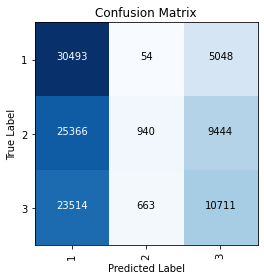

In [ ]:
# Definisikan label kelas
class_names = ['1',
                '2',
                '3'
              ]  # Nama kelas

# Tampilkan confusion matrix menggunakan matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.colorbar()

# Atur label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Tulis nilai pada setiap sel confusion matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Atur label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Tampilkan plot confusion matrix
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(svc_linear.fit.history['accuracy'], label='Training Accuracy')
plt.plot(svc_linear.fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(svc_linear.fit.history['loss'], label='Training Loss')
plt.plot(svc_linear.fit.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

AttributeError: 'function' object has no attribute 'history'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the data
file_path = r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\PerclosEAR\output\combined_data_with_classes.csv'
df = pd.read_csv(file_path)

# Ensure the PERCLOS and MAR_Std columns are of type float
df['PERCLOS'] = df['PERCLOS'].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])
df['MAR_Std'] = df['MAR_Std'].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])

# Flatten the columns so each row has one value of PERCLOS and one value of MAR_Std
df = df.explode('PERCLOS')
df = df.explode('MAR_Std')

# Ensure the columns are of type float
df['PERCLOS'] = df['PERCLOS'].astype(float)
df['MAR_Std'] = df['MAR_Std'].astype(float)

# Separate features and target
X = df[['PERCLOS', 'MAR_Std']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply standardization
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf',gamma=1,C=0.001)

# Fit the classifier to the training data
svm_classifier.fit(X_train_scaled, y_train)

# You can now use X_train_scaled and X_test_scaled for training and testing your SVM model

# Example: Predicting using the trained model
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model (example using accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Now X_train_scaled and X_test_scaled are ready for use

Accuracy: 0.4177473072562358


In [4]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4184372820177818
